<a href="https://colab.research.google.com/github/vanand102/Final_Stroke-Data-Analysis/blob/main/Capstone2_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Modeling**

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import folder
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 2')

In [ ]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import stats
import os
import numpy as np

# modeling
#
from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
#

from library.sb_utils import save_file

In [ ]:
# the supplied CSV data file is the raw_data directory
scaled_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 2/stroke_data_4.csv')

In [ ]:
scaled_data.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,2.706375,1.001234,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,0.786070,2.121559,0.000000,1,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,1.626390,-0.005028,0.468577,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,0.255342,1.437358,0.715418,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,1.582163,1.501184,-0.635711,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   avg_glucose_level               5110 non-null   float64
 3   bmi                             5110 non-null   float64
 4   stroke                          5110 non-null   int64  
 5   gender_Female                   5110 non-null   int64  
 6   gender_Male                     5110 non-null   int64  
 7   gender_Other                    5110 non-null   int64  
 8   hypertension_0                  5110 non-null   int64  
 9   hypertension_1                  5110 non-null   int64  
 10  heart_disease_0                 5110 non-null   int64  
 11  heart_disease_1                 5110 non-null   int64  
 12  ever_married_No                 51

In [ ]:
scaled_data.describe()

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5.110000e+03,5.110000e+03,5.110000e+03,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,4.449583e-17,1.168015e-16,-2.780989e-18,0.048728,0.585910,0.413894,0.000196,0.902544,0.097456,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,21161.721625,1.000098e+00,1.000098e+00,1.000098e+00,0.215320,0.492612,0.492578,0.013989,0.296607,0.296607,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,67.000000,-1.908261e+00,-1.126958e+00,-2.415564e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,-8.061152e-01,-6.383223e-01,-6.616944e-01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,7.843218e-02,-3.149945e-01,-6.407951e-02,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,7.860701e-01,1.754080e-01,5.075521e-01,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,1.714845e+00,3.657145e+00,8.926127e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dropped the 'id' column in the X data as id is not a relevant feature. Additionally split the data into X and y datasets.

In [ ]:
X = scaled_data.drop(columns = ['stroke', 'id'])
y = scaled_data['stroke']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 2)
print('Training split has ', X_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_train))+ ')')
print('Test split has ', X_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_test)) + ')')

Training split has  4088  rows
 and the corresponding labels have an equal number of values. (4088)
Test split has  1022  rows
 and the corresponding labels have an equal number of values. (1022)


Grid Search - Regression Model

In [ ]:
search_space_regression = { "solver": ['lbfgs', 'liblinear', 'newton-cholesky'],
"C": [1,0.5,0.1,0.01,0.001] }

In [ ]:
Regression = LogisticRegression(max_iter = 500, class_weight='balanced')

In [ ]:
cv_sets = ShuffleSplit(3, test_size = 0.20, random_state = 0)

In [ ]:
#  Create the grid search object
Regression_Grid = GridSearchCV(estimator = Regression, param_grid = search_space_regression, scoring = 'recall', cv=cv_sets)

# Fit the grid search object to the data to compute the optimal model
Regression_Grid = Regression_Grid.fit(X_train, y_train)

In [ ]:
print("Best Score:" + str(Regression_Grid.best_score_))
print("Best Parameters: " + str(Regression_Grid.best_params_))

Best Score:0.8561640654031959
Best Parameters: {'C': 0.001, 'solver': 'liblinear'}


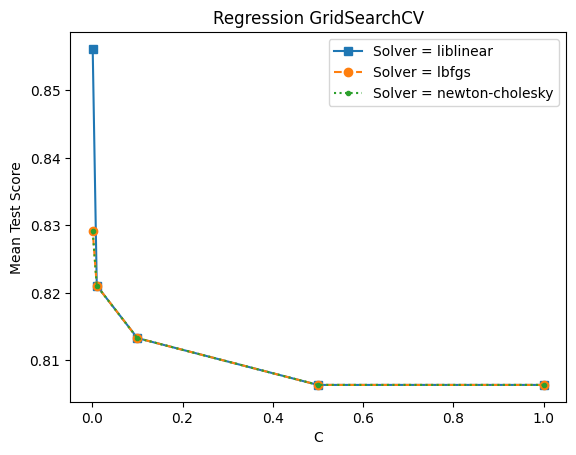

In [ ]:
#Turn results into dataframe
Regression_Griddf = pd.DataFrame(Regression_Grid.cv_results_)

# create data
C_x = [1,0.5,0.1,0.01,0.001]
Mean_score_lbfgs = Regression_Griddf[Regression_Griddf["param_solver"] == "lbfgs"]['mean_test_score']
Mean_score_ll = Regression_Griddf[Regression_Griddf["param_solver"] == "liblinear"]['mean_test_score']
Mean_score_nc = Regression_Griddf[Regression_Griddf["param_solver"] == "newton-cholesky"]['mean_test_score']

#plot graph
plt.plot(C_x,Mean_score_ll, label = "Solver = liblinear",ls = '-', marker='s')
plt.plot(C_x,Mean_score_lbfgs, label = "Solver = lbfgs", ls = '--', marker='o')
plt.plot(C_x,Mean_score_nc, label = "Solver = newton-cholesky", ls = ':', marker='.')

plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.title('Regression GridSearchCV')
plt.legend()

plt.show()

Best parameters for Regression is the liblinear and a C of 0.001. This gives a recall score of 0.8561

Grid Search - Decision Tree Model

In [ ]:
search_space_decisiontree = { "criterion": ['gini', 'entropy', 'log_loss'],
"max_depth": [2,3,4,5,6] }

In [ ]:
Decision_Tree = tree.DecisionTreeClassifier(random_state = 1234,class_weight='balanced' )

In [ ]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'recall', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_train, y_train)

In [ ]:
print("Best Score:" + str(DT_Grid.best_score_))
print("Best Parameters: " + str(DT_Grid.best_params_))

Best Score:0.8889817911557042
Best Parameters: {'criterion': 'gini', 'max_depth': 2}


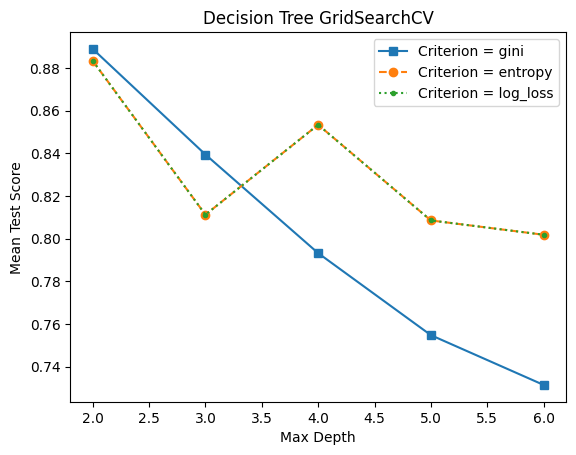

In [ ]:
#Turn results into dataframe
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

# create data
Max_depth_x = [2,3,4,5,6]
Mean_score_gini = DT_Griddf[DT_Griddf["param_criterion"] == "gini"]['mean_test_score']
Mean_score_entropy = DT_Griddf[DT_Griddf["param_criterion"] == "entropy"]['mean_test_score']
Mean_score_logloss = DT_Griddf[DT_Griddf["param_criterion"] == "log_loss"]['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score_gini, label = "Criterion = gini",ls = '-', marker='s')
plt.plot(Max_depth_x,Mean_score_entropy, label = "Criterion = entropy", ls = '--', marker='o')
plt.plot(Max_depth_x,Mean_score_logloss, label = "Criterion = log_loss", ls = ':', marker='.')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree GridSearchCV')
plt.legend()

plt.show()

Best parameters for Decision Tree is the gini and a max_depth of 2. This gives a recall score of 0.8889

Grid Search - Random Forest Model

In [ ]:
search_space_randomforest = {"criterion": ['gini', 'entropy', 'log_loss'],"max_depth": [2,3,4,5,6], "n_estimators":[10,25,100,150]}

In [ ]:
Random_Forest = RandomForestClassifier(random_state= 1234,class_weight='balanced')

In [ ]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'recall', cv = cv_sets)

In [ ]:
RF_Grid.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=None),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1234),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [10, 25, 100, 150]},
             scoring='recall')

In [ ]:
print("Best Score:" + str(RF_Grid.best_score_))
print("Best Parameters: " + str(RF_Grid.best_params_))

Best Score:0.8291527313266444
Best Parameters: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 150}


Entropy is the best performing model.

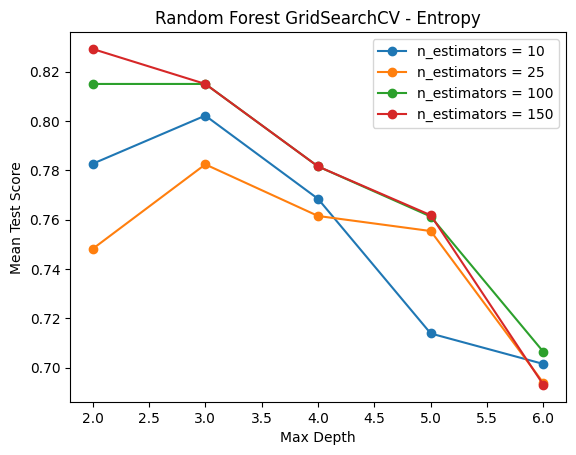

In [ ]:
#Turn results into dataframe
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

# create data
Max_depth_x = [2,3,4,5,6]
Mean_score_10 = RF_Griddf[(RF_Griddf["param_criterion"] == "entropy") & (RF_Griddf["param_n_estimators"] == 10)]['mean_test_score']
Mean_score_25 = RF_Griddf[(RF_Griddf["param_criterion"] == "entropy") & (RF_Griddf["param_n_estimators"] == 25)]['mean_test_score']
Mean_score_100 = RF_Griddf[(RF_Griddf["param_criterion"] == "entropy") & (RF_Griddf["param_n_estimators"] == 100)]['mean_test_score']
Mean_score_150 = RF_Griddf[(RF_Griddf["param_criterion"] == "entropy") & (RF_Griddf["param_n_estimators"] == 150)]['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score_10, label = "n_estimators = 10", marker='o')
plt.plot(Max_depth_x,Mean_score_25, label = "n_estimators = 25", marker='o')
plt.plot(Max_depth_x,Mean_score_100, label = "n_estimators = 100", marker='o')
plt.plot(Max_depth_x,Mean_score_150, label = "n_estimators = 150", marker='o')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Random Forest GridSearchCV - Entropy')
plt.legend()

plt.show()

Best parameters for Random Forest is the entropy, max_depth of 2, and n estimators of 150. This gives a recall score of 0.8291

Best performing model

In [ ]:
Final_model= tree.DecisionTreeClassifier(criterion="gini", random_state = 1234,class_weight='balanced', max_depth = 2)

Final_model.fit(X_train, y_train)

y_pred_test = Final_model.predict(X_test)
y_pred_training = Final_model.predict(X_train)

Final_model

DecisionTreeClassifier(class_weight='balanced', max_depth=2, random_state=1234)

In [ ]:
print("[Test] Recall score (y_test, y_pred_test):",
      f'{recall_score(y_test, y_pred_test):.4f}')

[Test] Recall score (y_test, y_pred_test): 0.8235


In [ ]:
print("[Training] Recall score: (y_train, y_pred_training)",
      f'{recall_score(y_train, y_pred_training):.4f}')

[Training] Recall score: (y_train, y_pred_training) 0.8889


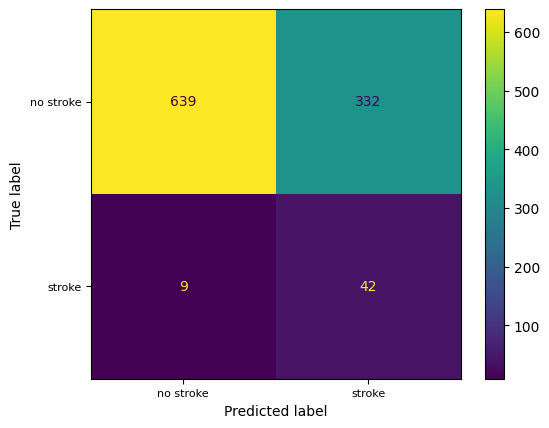

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels = Final_model.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm,
                                    display_labels = ['no stroke', 'stroke'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no stroke', 'stroke'], fontsize = 8)
ax.set_yticklabels(labels = ['no stroke', 'stroke'], fontsize = 8)
display_cm.plot(ax = ax)

Checked the features importance and noted that this model is only using the age column to make predictions. As a next steps, we may need to address this as if the model relies too heavily on 1 feature, this can lead to overfitting.

In [ ]:
Final_model.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])